In [29]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set()
import sympy
import random

alpha=1
x=sympy.Symbol('x')
y=sympy.Symbol('y')
f=alpha*(x**2-y)**2+(x-1)**2
#f=sympy.sin(x**2+sympy.cos(y))

In [30]:
def find_min_1D(a,b,f,eps):
    delta=0.5*eps
    while abs(a-b)>=eps:
        x=(a+b)/2
        k1=f(x-delta)
        k2=f(x+delta)
        if k1<k2:
            b=x
        else:
            a=x
    return x

In [31]:
f

(x - 1)**2 + (x**2 - y)**2

In [32]:
diff_f_x=sympy.diff(f,x)
diff_f_y=sympy.diff(f,y)
diff_f_x_x=sympy.diff(diff_f_x,x)
diff_f_x_y=sympy.diff(diff_f_x,y)
diff_f_y_x=sympy.diff(diff_f_y,x)
diff_f_y_y=sympy.diff(diff_f_y,y)

In [33]:
diff_f_x_y

-4*x

In [12]:
def sympy2def(f):
    return lambda x,y:f.subs({'x':x,'y':y})

In [14]:
Gesse = np.array([[sympy2def(diff_f_x_x), sympy2def(diff_f_x_y)],
                  [sympy2def(diff_f_y_x), sympy2def(diff_f_y_y)]])

In [20]:
x=[1,0]
Gesse_x=np.array([[Gesse[0][0](x[0],x[1]),Gesse[0][1](x[0],x[1])],
                 [Gesse[1][0](x[0],x[1]),Gesse[1][1](x[0],x[1])]])

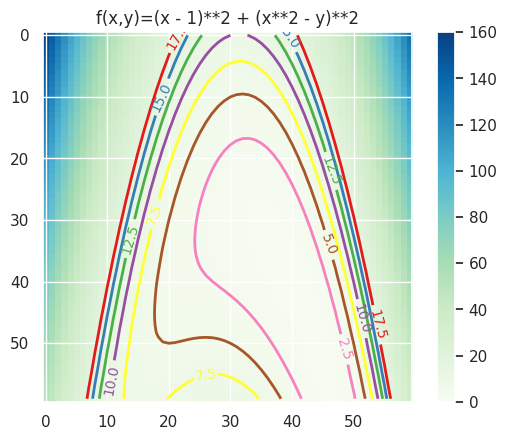

In [52]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

 
x_range = arange(-3.0,3.0,0.1)
y_range = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

im = imshow(Z,cmap=cm.GnBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(0,20,2.5),linewidths=2,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('f(x,y)='+str(f))
show()

In [53]:
#Метод сопряжённых градиентов

In [54]:
def Conjugate_gradient_method(f,start_pos,eps,steps_lim=5000):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    grad_norms.append(norm(grad))
    steps=0
    p_k=grad
    while norm(grad)>=eps and steps<steps_lim:
        steps+=1
        grad_norms.append(norm(grad))     
        
        w_p=np.dot(grad,p_k)
        
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
        
        w_2 = np.dot(grad,grad)
        
        y_k=w_2/w_p
        
        p_k=y_k*p_k+grad
        
        fi=lambda C:(sympy2def(f))((Xs[-1] + C*p_k)[0], (Xs[-1] + C*p_k)[1])
        C_best=find_min_1D(0,10,fi,eps)
        Xs.append(Xs[-1] + C_best*p_k)
        
    return Xs,steps,(sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms
        

In [55]:
history,steps,min_val,grad_norms=Conjugate_gradient_method(f,(-1,2),0.001)

In [56]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=38, min_val=2.76333731853057e-7, coordinate=[0.9995456  0.99882711]


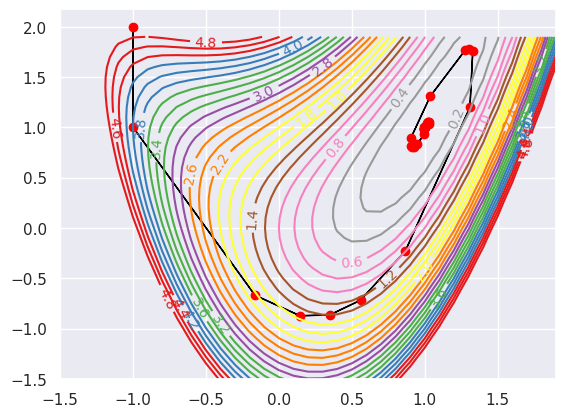

In [57]:
_hist=np.array(history).transpose()



x_range = arange(-1.5,2,0.1)
y_range = arange(-1.5,2,0.1)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,5,0.2),linewidths=1.5,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.01, head_length=0.015,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

In [60]:
#Флетчер Ривс

In [61]:
def Fletcher_reeves_gradient_method(f,start_pos,eps,steps_lim=10):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    grad_norms.append(norm(grad))
    steps=0
    p_k=grad
    while norm(grad)>=eps and steps<steps_lim:
        steps+=1
        grad_norms.append(norm(grad))     
        
        w_k_2=np.dot(grad, grad)
        
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
        
        w_2 = np.dot(grad,grad)
        
        y_k=w_2/w_k_2
        
        p_k=y_k*p_k+grad
        
        fi=lambda C:(sympy2def(f))((Xs[-1] + C*p_k)[0], (Xs[-1] + C*p_k)[1])
        C_best=find_min_1D(0,10,fi,eps)
        Xs.append(Xs[-1] + C_best*p_k)
        
    return Xs,steps,(sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms

In [62]:
history,steps,min_val,grad_norms=Fletcher_reeves_gradient_method(f,(-1,2),0.001)

In [63]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=10, min_val=2.43099064085319, coordinate=[ 0.51903891 -1.21372608]


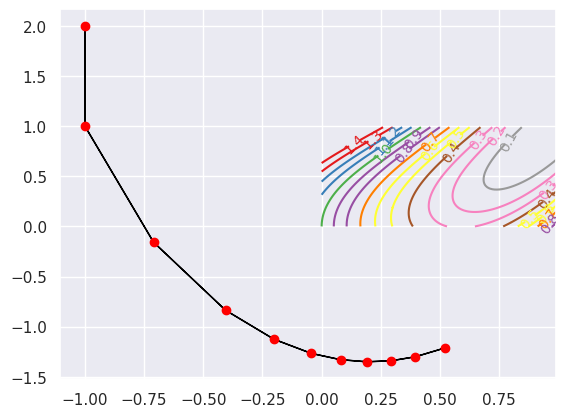

In [64]:
_hist=np.array(history).transpose()



x_range = arange(-0,1,0.01)
y_range = arange(-0,1,0.01)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,1.5,0.1),linewidths=1.5,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.01, head_length=0.015,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

In [65]:
#Метод Полака-Рибьера

In [66]:
def Polak_ribiere_gradient_method(f,start_pos,eps,steps_lim=500):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    grad_norms.append(norm(grad))
    steps=0
    p_k=grad
    while norm(grad)>=eps and steps<steps_lim:
        steps+=1
        grad_norms.append(norm(grad))     
        
        w_down=np.dot(grad, grad)
        grad_copy=grad
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
        
        w_upper = np.dot(grad-grad_copy,grad)
        
        y_k=w_upper/w_down
        
        p_k=y_k*p_k+grad
        
        fi=lambda C:(sympy2def(f))((Xs[-1] + C*p_k)[0], (Xs[-1] + C*p_k)[1])
        C_best=find_min_1D(0,10,fi,eps)
        Xs.append(Xs[-1] + C_best*p_k)
        
    return Xs,steps,(sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms

In [41]:
history,steps,min_val,grad_norms=Polak_ribiere_gradient_method(f,(0,0.1),0.001)

In [45]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=4, min_val=6.71222210721181e-11, coordinate=[1.00000337 0.99999928]


AttributeError: 'Float' object has no attribute 'hypot'

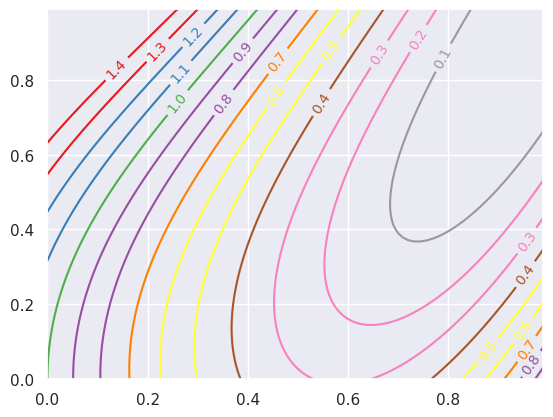

In [51]:
_hist=np.array(history).transpose()



x_range = arange(-0,1,0.01)
y_range = arange(-0,1,0.01)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,1.5,0.1),linewidths=1.5,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.01, head_length=0.015,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

In [ ]:
_hist

In [23]:
#Метод сопряженных градиентов через матрицу Гессе

In [24]:
Gesse_x=np.array([[Gesse[0][0](x[0],x[1]),Gesse[0][1](x[0],x[1])],
                 [Gesse[1][0](x[0],x[1]),Gesse[1][1](x[0],x[1])]])

In [46]:
def Gesse_method(f,start_pos,eps,steps_lim=500):
    Xs=[np.array(start_pos)]
    diff_f_x=sympy.diff(f,x)
    diff_f_y=sympy.diff(f,y)
    grad_norms=[]
    grad=-np.array([
        float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
        float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
    ])
    grad_norms.append(norm(grad))
    steps=0
    p_k=grad
    while norm(grad)>=eps and steps<steps_lim:
        steps+=1
        grad_norms.append(norm(grad)) 
        
        X=Xs[-1]
        Gesse_x = np.array([[Gesse[0][0](X[0],X[1]),Gesse[0][1](X[0],X[1])],
                         [Gesse[1][0](X[0],X[1]),Gesse[1][1](X[0],X[1])]])
        
        Gesse_times_p = (Gesse_x @ p_k.reshape((2,1))).reshape((2,))
        
        grad=-np.array([
            float(diff_f_x.subs({'x':Xs[-1][0],'y':Xs[-1][1]})),
            float(diff_f_y.subs({'x':Xs[-1][0],'y':Xs[-1][1]}))
        ])
        
        c_up = np.dot(Gesse_times_p,grad)
        c_down = np.dot(Gesse_times_p, p_k)
        
        y_k=c_up/c_down
        
        p_k=y_k*p_k+grad
        
        fi=lambda C:(sympy2def(f))((Xs[-1] + C*p_k)[0], (Xs[-1] + C*p_k)[1])
        C_best=find_min_1D(0,10,fi,eps)
        Xs.append(Xs[-1] + C_best*p_k)
        
    return Xs,steps,(sympy2def(f))(Xs[-1][0],Xs[-1][1]), grad_norms

In [47]:
history,steps,min_val,grad_norms=Gesse_method(f,(0,0.1),0.001)

In [48]:
print(f'{steps=}, {min_val=}, coordinate={history[-1]}')

steps=40, min_val=5.96473783098795e-7, coordinate=[0.999261151787397 0.998297955937037]


AttributeError: 'Float' object has no attribute 'hypot'

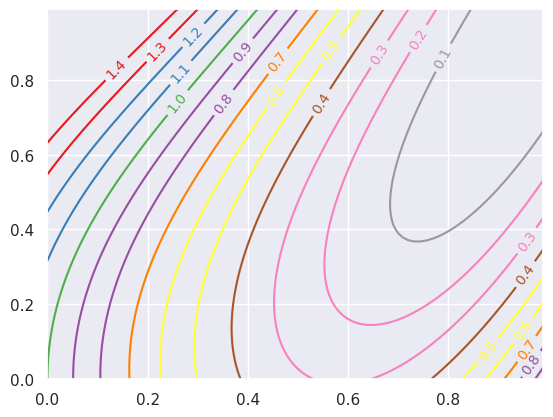

In [49]:
_hist=np.array(history).transpose()



x_range = arange(-0,1,0.01)
y_range = arange(-0,1,0.01)
X,Y = meshgrid(x_range, y_range) # grid of point
Z=np.zeros((len(X),len(X[0])))
for i in range(len(X)):
    for j in range(len(X[0])):
        Z[i][j]=(sympy2def(f))(X[i][j], Y[i][j])
 # evaluation of the function on the grid

# adding the Contour lines with labels
cset = contour(x_range,y_range,Z,arange(0,1.5,0.1),linewidths=1.5,cmap=cm.Set1_r)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)




for i in range(1,len(_hist[0])):
    plt.arrow(_hist[0][i-1],_hist[1][i-1],_hist[0][i]-_hist[0][i-1],_hist[1][i]-_hist[1][i-1],
          shape='full', color='black', head_width=0.01, head_length=0.015,length_includes_head=True)

plt.scatter(_hist[0],_hist[1],color='red')
plt.show()

In [50]:
_hist

array([[0.0, 0.593261718750000, 0.560273406765484, 0.630981556717081,
        0.847174863298219, 0.781171912118129, 0.751212566817336,
        0.930164443678312, 0.880217695881975, 0.863628011137014,
        0.857843202768127, 0.869101237333436, 0.890461813443225,
        0.879830126026200, 0.946060391904696, 0.924246745441163,
        0.915868766223541, 0.916770820904972, 0.922552754903761,
        0.929352647986596, 0.929168213192186, 0.933918171540756,
        0.939907240314720, 0.937391319156288, 0.941701179162260,
        0.949882661792301, 0.945708468667407, 0.973752337729800,
        0.964191937241386, 0.960529801830814, 0.959567965396659,
        0.962148757578164, 0.965841014920999, 0.963590733505268,
        0.966492023667074, 0.967732862205628, 0.969705871090998,
        0.971886934768401, 1.00085129784485, 0.999305543635374,
        0.999261151787397],
       [0.1, 0.0406738281250000, 0.256629711400500, 0.208327999776393,
        0.450931832128607, 0.427613899844200, 0.4449